In [0]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


# Load data

In [0]:
from keras.datasets import imdb


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
import numpy as np

In [0]:
def one_hot_encode(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
X_train = one_hot_encode(x_train)
X_test = one_hot_encode(x_test)

In [0]:
X_val = X_train[:10000]
partial_x_train = X_train[10000:]

In [0]:
Y_train = np.array(y_train).astype('float32')
Y_test = np.array(y_test).astype('float32')

In [0]:
Y_val = Y_train[:10000]
partial_y_train = Y_train[10000:]

In [0]:
from keras import models, layers

In [0]:
import matplotlib.pyplot as plt
def plot_compare_loss(oldLoss, newLoss):
  epochs = range(1, 21)
  plt.plot(epochs, oldLoss, 'b+', label='Original Model')
  plt.plot(epochs, newLoss, 'bo', label='New Model')
  plt.xlabel('Epochs')
  plt.ylabel('Validation Loss')
  plt.legend()
  plt.show()

# Original Model

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))
history_dict = history.history

W0625 13:28:28.746228 139678988101504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 13:28:28.788313 139678988101504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 13:28:28.793771 139678988101504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 13:28:28.847387 139678988101504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 13:28:28.865283 139678988101504 deprecation_wrappe

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 353us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_a

# Reducing network's size

In [0]:
model1 = models.Sequential()
model1.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))
history_dict1 = history1.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5729 - acc: 0.7927 - val_loss: 0.4772 - val_acc: 0.8403
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3905 - acc: 0.8875 - val_loss: 0.3634 - val_acc: 0.8761
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2940 - acc: 0.9097 - val_loss: 0.3111 - val_acc: 0.8873
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2334 - acc: 0.9274 - val_loss: 0.3009 - val_acc: 0.8786
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1938 - acc: 0.9375 - val_loss: 0.2742 - val_acc: 0.8904
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1647 - acc: 0.9474 - val_loss: 0.2734 - val_acc: 0.8906
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1416 - acc: 0.9552 - val_loss: 0.2795 - val_ac

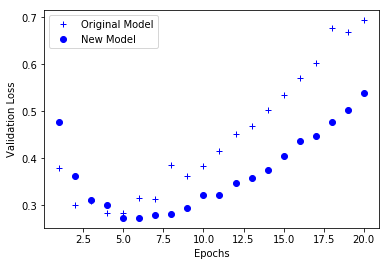

In [0]:
oldLoss = history_dict['val_loss']
newLoss = history_dict1['val_loss']
plot_compare_loss(oldLoss, newLoss)

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))
history_dict2 = history2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.5360 - acc: 0.7760 - val_loss: 0.2941 - val_acc: 0.8825
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2677 - acc: 0.9007 - val_loss: 0.3113 - val_acc: 0.8656
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1435 - acc: 0.9455 - val_loss: 0.4161 - val_acc: 0.8426
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0938 - acc: 0.9691 - val_loss: 0.3630 - val_acc: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0143 - acc: 0.9962 - val_loss: 3.2552 - val_acc: 0.6024
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0779 - acc: 0.9863 - val_loss: 0.4558 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 7.1792e-04 - acc: 1.0000 - val_loss: 0.555

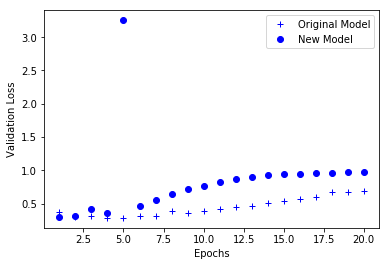

In [0]:
oldLoss = history_dict['val_loss']
newLoss = history_dict2['val_loss']
plot_compare_loss(oldLoss, newLoss)

# L2 Regularization

In [0]:
from keras import regularizers

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))
history_dict3 = history3.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.5700 - acc: 0.7876 - val_loss: 0.4846 - val_acc: 0.8243
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.3755 - acc: 0.8954 - val_loss: 0.3678 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2948 - acc: 0.9184 - val_loss: 0.3354 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2553 - acc: 0.9304 - val_loss: 0.3374 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2337 - acc: 0.9399 - val_loss: 0.3418 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2180 - acc: 0.9466 - val_loss: 0.3330 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2031 - acc: 0.9526 - val_loss: 0.3396 - val_a

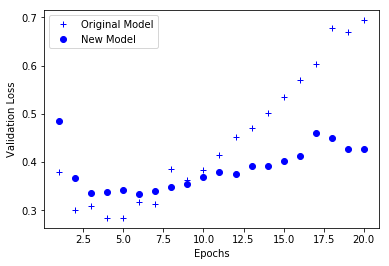

In [0]:
oldLoss = history_dict['val_loss']
newLoss = history_dict3['val_loss']
plot_compare_loss(oldLoss, newLoss)

# Dropout

In [0]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, Y_val))
history_dict4 = history4.history

W0625 13:59:45.463710 139678988101504 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.6383 - acc: 0.6236 - val_loss: 0.5497 - val_acc: 0.8381
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5392 - acc: 0.7463 - val_loss: 0.4584 - val_acc: 0.8383
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.4616 - acc: 0.8129 - val_loss: 0.4049 - val_acc: 0.8526
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.4007 - acc: 0.8477 - val_loss: 0.3372 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.3480 - acc: 0.8749 - val_loss: 0.3140 - val_acc: 0.8842
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3063 - acc: 0.8989 - val_loss: 0.3048 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2686 - acc: 0.9145 - val_loss: 0.3007 - val_ac

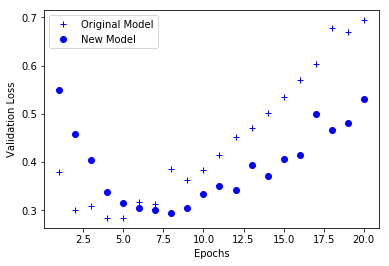

In [0]:
oldLoss = history_dict['val_loss']
newLoss = history_dict4['val_loss']
plot_compare_loss(oldLoss, newLoss)